In [14]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras import regularizers
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.models import load_model
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [15]:
os.listdir('./data/Training')

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [16]:
loc0 = './data/Training/no_tumor'
loc1 = './data/Training/pituitary_tumor'
loc2 = './data/Training/meningioma_tumor'
loc3 = './data/Training/glioma_tumor'

In [17]:
import cv2
from tqdm import tqdm
features = []

for img in tqdm(os.listdir(loc0)):
    f = cv2.imread(os.path.join(loc0,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)
    
for img in tqdm(os.listdir(loc1)):
    f = cv2.imread(os.path.join(loc1,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)
    
for img in tqdm(os.listdir(loc2)):
    f = cv2.imread(os.path.join(loc2,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)
    
for img in tqdm(os.listdir(loc3)):
    f = cv2.imread(os.path.join(loc3,img))
    fr = cv2.resize(f,(70,70))
    features.append(fr)

100%|██████████| 826/826 [00:10<00:00, 80.98it/s]


In [18]:
labels = []
for img in tqdm(os.listdir(loc0)):
    labels.append(0) #no tumor 
    
for img in tqdm(os.listdir(loc1)):
    labels.append(1) #pituitary_tumor
    
for img in tqdm(os.listdir(loc2)):
    labels.append(2) #meningioma_tumor
    
for img in tqdm(os.listdir(loc3)):
    labels.append(3) #glioma_tumor

100%|██████████| 826/826 [00:00<00:00, 2882275.46it/s]


In [19]:
import numpy as np
X = np.array(features)
Y = np.array(labels)

In [20]:
print(X.shape)
print(Y.shape)

(2870, 70, 70, 3)
(2870,)


In [21]:
#Define a CNN model to make predictions
weight_decay = 1e-4
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#2nd Convolutional Layer
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#3rd Convolutional Layer
model.add(Conv2D(128,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#4th Convolutional Layer
model.add(Conv2D(256,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#5th Convolutional Layer
model.add(Conv2D(512,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#6th Convolutional Layer
model.add(Conv2D(1024,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Fully connected layer
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 35, 35, 64)        0

In [23]:
#Compile your model

from keras import optimizers
from keras import metrics

sgd = optimizers.SGD(0.1)

model.compile(optimizer=sgd,
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [25]:
xtrain_n = xtrain/xtrain.max()
xtest_n = xtest/xtest.max()

In [26]:
ytrain_h = np_utils.to_categorical(ytrain)
ytest_h = np_utils.to_categorical(ytest)

In [ ]:
model.fit(xtrain_n,ytrain_h,
         epochs=100,
         validation_data=(xtest_n,ytest_h))

Epoch 1/100
72/72 [==============================] - 59s 790ms/step - loss: 0.7604 - accuracy: 0.4294 - val_loss: 0.8201 - val_accuracy: 0.3328
Epoch 2/100
72/72 [==============================] - 60s 833ms/step - loss: 0.5764 - accuracy: 0.5833 - val_loss: 0.8093 - val_accuracy: 0.3293
Epoch 3/100
72/72 [==============================] - 63s 874ms/step - loss: 0.5465 - accuracy: 0.5843 - val_loss: 1.0262 - val_accuracy: 0.3206
Epoch 4/100
72/72 [==============================] - 56s 772ms/step - loss: 0.5417 - accuracy: 0.5929 - val_loss: 1.0639 - val_accuracy: 0.3293
Epoch 5/100
72/72 [==============================] - 49s 681ms/step - loss: 0.5121 - accuracy: 0.6517 - val_loss: 1.3046 - val_accuracy: 0.3502
Epoch 6/100
72/72 [==============================] - 55s 768ms/step - loss: 0.5206 - accuracy: 0.6280 - val_loss: 0.9567 - val_accuracy: 0.5000
Epoch 7/100
72/72 [==============================] - 55s 765ms/step - loss: 0.4726 - accuracy: 0.7066 - val_loss: 0.8027 - val_accuracy:

Epoch 58/100
72/72 [==============================] - 64s 892ms/step - loss: 0.2225 - accuracy: 0.9481 - val_loss: 0.5701 - val_accuracy: 0.7979
Epoch 59/100
72/72 [==============================] - 68s 948ms/step - loss: 0.2097 - accuracy: 0.9561 - val_loss: 0.3062 - val_accuracy: 0.9059
Epoch 60/100
72/72 [==============================] - 67s 930ms/step - loss: 0.2222 - accuracy: 0.9465 - val_loss: 0.2919 - val_accuracy: 0.9181
Epoch 61/100
72/72 [==============================] - 66s 919ms/step - loss: 0.2295 - accuracy: 0.9369 - val_loss: 0.3351 - val_accuracy: 0.9129
Epoch 62/100
72/72 [==============================] - 62s 862ms/step - loss: 0.2347 - accuracy: 0.9360 - val_loss: 0.2875 - val_accuracy: 0.9233
Epoch 63/100
72/72 [==============================] - 58s 810ms/step - loss: 0.2143 - accuracy: 0.9491 - val_loss: 0.3879 - val_accuracy: 0.8920
Epoch 64/100
72/72 [==============================] - 58s 812ms/step - loss: 0.2111 - accuracy: 0.9518 - val_loss: 0.2901 - val_ac

In [27]:
model=load_model('tumor_CNN.h5')

In [28]:
model.evaluate(xtrain_n,ytrain_h)

72/72 [==============================] - 4s 58ms/step - loss: 0.1802 - accuracy: 0.9830


[0.18023426830768585, 0.983013927936554]

In [29]:
model.evaluate(xtest_n,ytest_h)


18/18 [==============================] - 1s 55ms/step - loss: 0.1679 - accuracy: 0.9791


[0.16789743304252625, 0.9790940880775452]

In [30]:
ytest_pred = []
preds = model.predict(xtest_n)
for p in preds:
    ytest_pred.append(np.argmax(p))

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ytest_pred)

array([[ 84,   1,   1,   0],
       [  0, 169,   1,   0],
       [  6,   0, 163,   2],
       [  0,   0,   1, 146]])

In [32]:
xtrain_n.shape


(2296, 70, 70, 3)

In [47]:
xtest_n[90].shape


(70, 70, 3)

Predictions pituitary_tumor
Actual pituitary_tumor


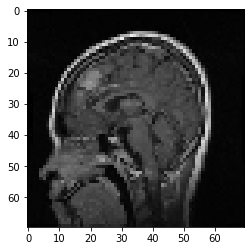

In [57]:
predictions = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
x=121

print('Predictions',predictions[np.argmax(model.predict(xtest_n[i].reshape(1,70,70,3)))])
print('Actual',predictions[ytest[i]])


import matplotlib.pyplot as plt
plt.imshow(xtest_n[90])
plt.show()

Predictions 3


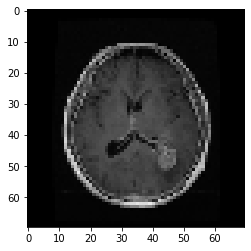

In [58]:
path = './data/Training/glioma_tumor/gg (10).jpg'
img = cv2.imread(path)
img = cv2.resize(img,(70,70))
img = img/xtrain.max()
print('Predictions',np.argmax(model.predict(img.reshape(1,70,70,3))))

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [59]:
xtrain.max()

255